Load regression data

In [58]:
from sklearn.datasets import load_boston
boston_meta = load_boston()
X = boston_meta.data
y = boston_meta.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

X, at this point, is a numpy matrix (just numbers)

In [59]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

The reason why Boston X data is a numpy matrix, with no column names, is because the Boston dataset is inside the scikit-learn library, already prepared for use. However, in more real situations (like the assignment), we read the data from a file into a Pandas dataframe. In that case, columns would have names. In order to simulate a real situation more closely, we are going to put the names of the columns by hand (notice that if data is read from a file into a Pandas dataframe, as you do in the assignments, you don't have to do this).

In [60]:
import pandas as pd
X = pd.DataFrame(X)
X.columns = boston_meta.feature_names

Now, X is a dataframe with column names

In [61]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [62]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=42)

Define pipeline for KNN (with scaling)

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
knn = KNeighborsRegressor()

pipe_scale_knn = Pipeline([
  ('scale', scaler),
  ('knn', knn)                     
])

And now, we add feature selection, specifying that the 3 most important features, according to the f_regression criterion must be selected.

In [64]:
from sklearn.feature_selection import SelectKBest, f_regression

scaler = StandardScaler()
selector = SelectKBest(f_regression, k=3)
knn = KNeighborsRegressor()

pipe_select_scale_knn = Pipeline([
  ('scale', scaler),
  ('select', selector),
  ('knn', knn)])

The model is trained

In [65]:
pipe_select_scale_knn.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('select',
                 SelectKBest(k=3,
                             score_func=<function f_regression at 0x7faf1fa738c0>)),
                ('knn', KNeighborsRegressor())])

We can even check which features were selected.

In [66]:
pipe_select_scale_knn.named_steps

{'scale': StandardScaler(),
 'select': SelectKBest(k=3, score_func=<function f_regression at 0x7faf1fa738c0>),
 'knn': KNeighborsRegressor()}

In [67]:
import numpy as np
print(f"Features selected: {pipe_select_scale_knn.named_steps['select'].get_support()}")

print(f"Locations where features selected: {np.where(pipe_select_scale_knn.named_steps['select'].get_support())}")

feature_names_before_selection = pipe_select_scale_knn.named_steps['scale'].get_feature_names_out()
print(f"In Scikit-learn 1.x, we can even get the feature names after selection: {pipe_select_scale_knn.named_steps['select'].get_feature_names_out(feature_names_before_selection)}")



Features selected: [False False False False False  True False False False False  True False
  True]
Locations where features selected: (array([ 5, 10, 12]),)
In Scikit-learn 1.x, we can even get the feature names after selection: ['RM' 'PTRATIO' 'LSTAT']


We can evaluate the model with the selected features on the testing partition:

In [68]:
from sklearn.metrics import mean_squared_error

predictions_test = pipe_select_scale_knn.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions_test))

4.142320477089049

Now, let's select the optimal number of features using HPO (grid search)

In [69]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

scaler = StandardScaler()
selector = SelectKBest(f_regression)
knn = KNeighborsRegressor()

pipe_select_scale_knn = Pipeline([
  ('scale', scaler),
  ('select', selector),
  ('knn', knn)])

param_grid = {'select__k': list(range(1,14))}
inner = KFold(n_splits=3, shuffle=True, random_state = 42 )
tune_select_scale_knn = GridSearchCV(pipe_select_scale_knn,
                                     param_grid,
                                     scoring="neg_mean_squared_error",
                                     cv=inner
                                     )


In [70]:
np.random.seed(42)
tune_select_scale_knn.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('select',
                                        SelectKBest(score_func=<function f_regression at 0x7faf1fa738c0>)),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'select__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13]},
             scoring='neg_mean_squared_error')

It seems that feature selection considers that 5 out of the 13 features are important.

In [71]:
import numpy as np
tune_select_scale_knn.best_params_, np.sqrt(-tune_select_scale_knn.best_score_)

({'select__k': 5}, 4.421168104987407)

We can also see the feature names after feature selection

In [74]:
trained_pipeline = tune_select_scale_knn.best_estimator_

print(f"Features selected: {trained_pipeline.named_steps['select'].get_support()}")

print(f"Locations where features selected: {np.where(trained_pipeline.named_steps['select'].get_support())}")

# Feature names before selection (i.e. after scaling)
feature_names_before_selection = trained_pipeline.named_steps['scale'].get_feature_names_out()
print(f"In Scikit-learn 1.x, we can even get the feature names after selection: {trained_pipeline.named_steps['select'].get_feature_names_out(feature_names_before_selection)}")



Features selected: [False False  True False False  True False False False  True  True False
  True]
Locations where features selected: (array([ 2,  5,  9, 10, 12]),)
In Scikit-learn 1.x, we can even get the feature names after selection: ['INDUS' 'RM' 'TAX' 'PTRATIO' 'LSTAT']


We can also check the performance for every number of features:

In [75]:
from pprint import pprint

pprint(list(zip(tune_select_scale_knn.cv_results_['param_select__k'].data, -tune_select_scale_knn.cv_results_['mean_test_score'])))


[(1, 32.08262961441214),
 (2, 22.318914159292035),
 (3, 21.09082045933418),
 (4, 19.9036955225453),
 (5, 19.546727412557942),
 (6, 26.017920290771176),
 (7, 25.43963490307628),
 (8, 24.827432142857138),
 (9, 25.12606575010535),
 (10, 25.725768057311416),
 (11, 25.516556099873572),
 (12, 26.732194384745043),
 (13, 27.68686151495997)]


We can plot these results.

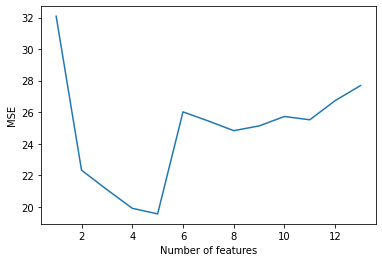

In [76]:
import matplotlib.pyplot as plt
plt.plot(tune_select_scale_knn.cv_results_['param_select__k'].data, -tune_select_scale_knn.cv_results_['mean_test_score'])
plt.ylabel('MSE')
plt.xlabel('Number of features')
plt.show()

But the important result is the evaluation of the model on test

In [77]:
from sklearn.metrics import mean_squared_error

predictions_test = tune_select_scale_knn.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions_test))

3.9359279711502397